### **واعمال اندیکاتورهای میانگین متحرک ساده و نمایی بر روی داده های بازار  LSTM پیش بینی بازار سهام با استفاده ازالگوریتم**

In [1]:
import math
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
#import mplfinance as mplf

# **جلسه اول : روش های مختلف برداشت دیتاست از دیتا ریدر و یاهو به صورت آنلاین و پیش پردازش دیتا** 

In [2]:

# Dataset Generating


#df=pd.read_csv('TSLA.csv')
#print(df)
#data= pd.read_csv('stock_data.csv')
data = pdr.get_data_yahoo('AAPL', start='2012-01-01', end='2019-12-17')
print(data)

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-01-03  14.621429  14.732143  14.607143  14.686786  12.482929  302220800
2012-01-04  14.642857  14.810000  14.617143  14.765714  12.550014  260022000
2012-01-05  14.819643  14.948214  14.738214  14.929643  12.689343  271269600
2012-01-06  14.991786  15.098214  14.972143  15.085714  12.821992  318292800
2012-01-09  15.196429  15.276786  15.048214  15.061786  12.801656  394024400
...               ...        ...        ...        ...        ...        ...
2019-12-10  67.150002  67.517502  66.464996  67.120003  65.565010   90420400
2019-12-11  67.202499  67.775002  67.125000  67.692497  66.124260   78756800
2019-12-12  66.945000  68.139999  66.830002  67.864998  66.292770  137310400
2019-12-13  67.864998  68.824997  67.732498  68.787498  67.193893  133587600
2019-12

In [3]:
df=data
df.shape

(2002, 6)

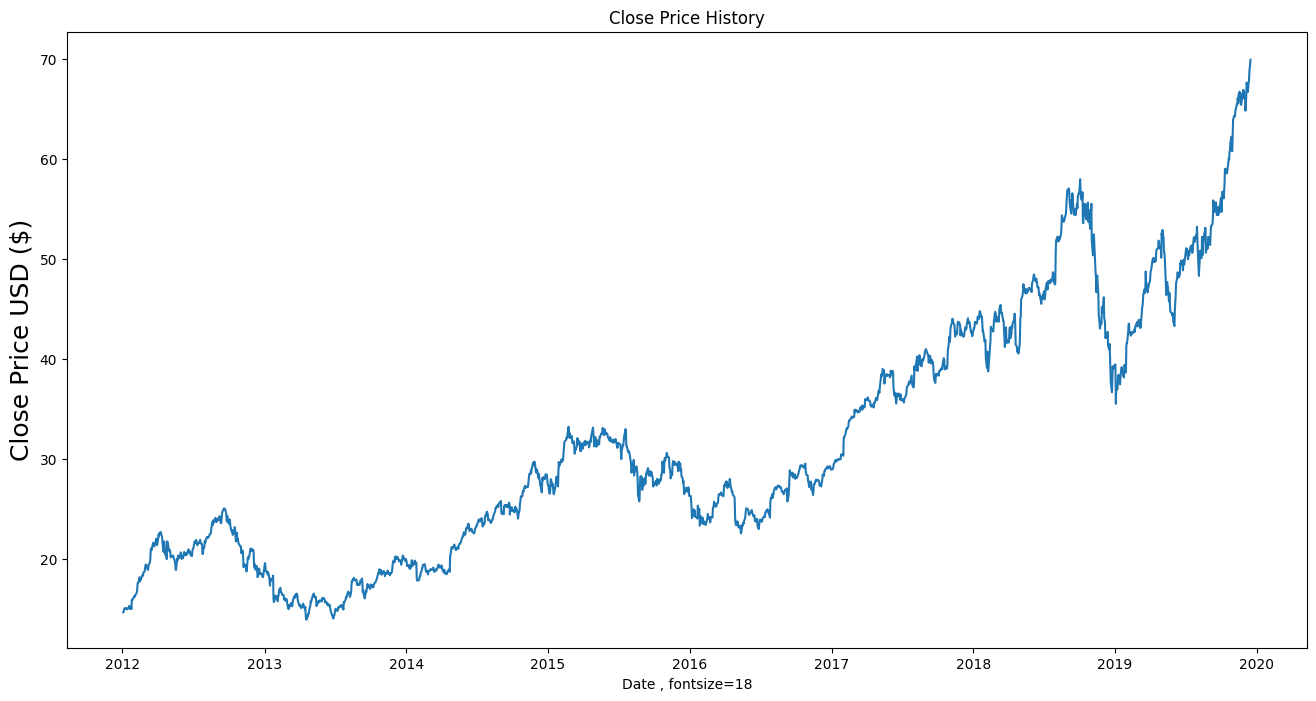

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date , fontsize=18')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
# Show Candlestick Chart 
#mplf.plot(df, type='candle', mav=(18, 30, 60), volume=True)

In [6]:
# creat the 'Close Cloumn'
data=df.filter(['Close'])
print(data)
# convert to numpy
dataset=data.values
print(dataset.shape)
# the number of rows to be trained
training_data_len= math.ceil(len(dataset)*.8)
training_data_len

                Close
Date                 
2012-01-03  14.686786
2012-01-04  14.765714
2012-01-05  14.929643
2012-01-06  15.085714
2012-01-09  15.061786
...               ...
2019-12-10  67.120003
2019-12-11  67.692497
2019-12-12  67.864998
2019-12-13  68.787498
2019-12-16  69.964996

[2002 rows x 1 columns]
(2002, 1)


1602

In [7]:
# scale the data
scalar=MinMaxScaler(feature_range=(0,1))
scaled_data=scalar.fit_transform(dataset)

print(scaled_data.shape)

(2002, 1)


In [8]:
import cv2
from google.colab.patches import cv2_imshow

In [9]:
#img_1=cv2.imread('Project_1.PNG')
#cv2_imshow(img_1)

# **برای پیش بینی بازار سهام LSTM جلسه دوم: آماده سازی داده ها برای فرآیند آموزش و ایجاد مدل الگوریتم ***

# **LSTM ساختار الگوریتم**

In [10]:
#img=cv2.imread('LSTM.PNG')
#cv2_imshow(img)

In [11]:
# creat scaled data for training

train_data=scaled_data[0:training_data_len,:]

# split data to x_train , x_test
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  


In [12]:
#convert  the x_train , y_train to numpy arrays

x_train,y_train=np.array(x_train),np.array(y_train)

In [13]:
#Reshape the data

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

x_train.shape



(1542, 60, 1)

In [14]:
#Build the LSTM model

model=Sequential()
model.add(LSTM(50, return_sequences=True , input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [15]:
# Compile the Model 
model.compile(optimizer='adam',loss='mean_squared_error')


In [16]:
# Train the Model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1542/1542 [==============================] - 72s 41ms/step - loss: 8.5333e-04


In [17]:
#img_2=cv2.imread('Project_2.PNG')
#cv2_imshow(img_2)

## ***جلسه سوم: تست واعتبار سنجی داده ها و پیش بینی بازار سهام ***

In [18]:
# Creating the testing dataset

test_data=scaled_data[training_data_len-60:,:]
x_test=[] 
y_test=dataset[training_data_len:,:]
print(len(test_data))
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  


460


In [19]:
#convert x_test to numpy arrays
x_test=np.array(x_test)

In [20]:
# Reshape x_test

x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [21]:
# Prediction
predictions=model.predict(x_test)
predictions=scalar.inverse_transform(predictions)

13/13 [==============================] - 2s 20ms/step


In [22]:
# The root mean squared error
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

4.619610872268677

<ipython-input-23-c2c54d2b4ffa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


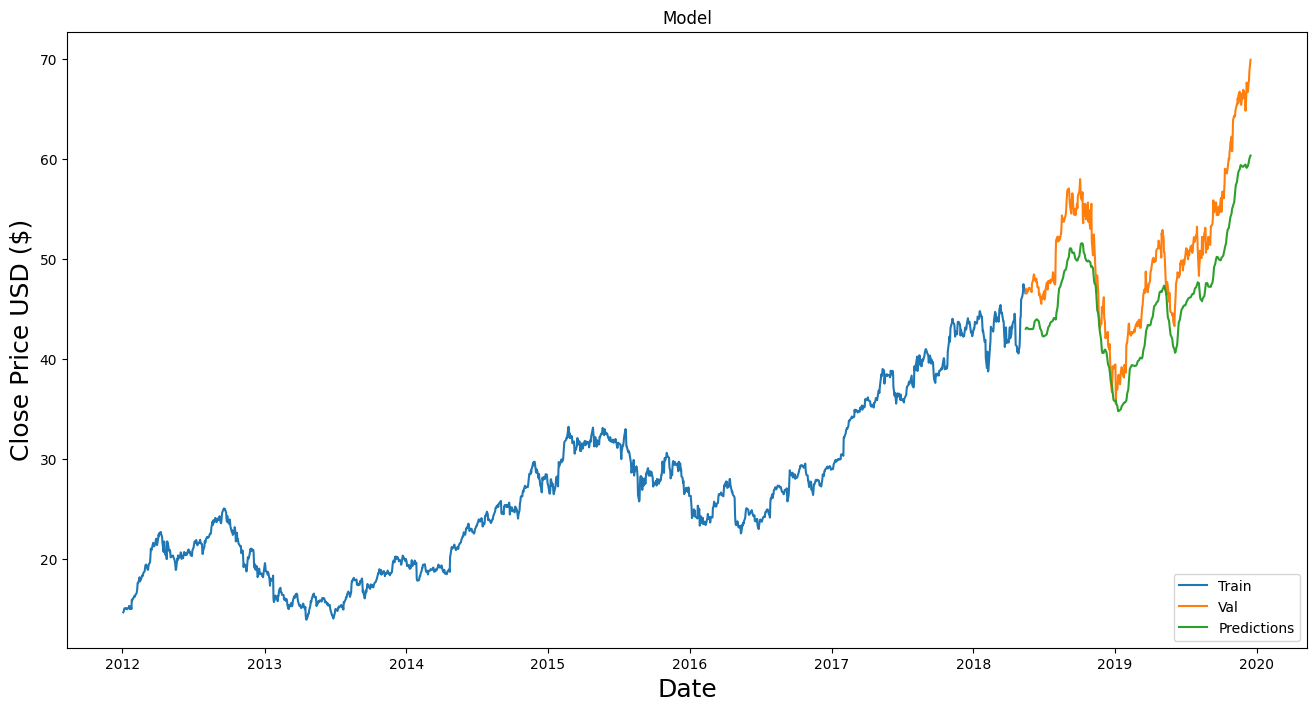

In [23]:
#Plot the data

train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)' , fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()




In [24]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-16,47.044998,43.040047
2018-05-17,46.747501,43.144749
2018-05-18,46.577499,43.166172
2018-05-21,46.907501,43.121319
2018-05-22,46.790001,43.079174
...,...,...
2019-12-10,67.120003,59.457100
2019-12-11,67.692497,59.620090
2019-12-12,67.864998,59.834255


In [25]:
aapl = pdr.get_data_yahoo('AAPL', start='2012-01-01', end='2019-12-17')

# Create a new data frame
new_df=aapl.filter(['Close'])


# Get the last 60 day Closing price values and convert the dataframe to an array

last_60_days=new_df[-60:].values


# Scale the data to be values between 0 and 1

last_60_days_scaled=scalar.transform(last_60_days)
  
# Create an empty list

X_test=[]

X_test.append(last_60_days_scaled)

# Convert the numpy array

X_test=np.array(X_test)

# Reshape the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred_price=model.predict(X_test)

# Get the predicted scalar price
pred_price=scalar.inverse_transform(pred_price)
print(pred_price)



[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 33ms/step
[[60.81242]]


In [26]:
aapl_2= pdr.get_data_yahoo('AAPL', start='2019-12-17', end='2019-12-20')
print(aapl_2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2019-12-17    70.102501
2019-12-18    69.934998
2019-12-19    70.004997
Name: Close, dtype: float64


In [27]:
#img_3=cv2.imread('Project_3.PNG')
#cv2_imshow(img_3)

# ***جلسه چهارم: اعمال اندیکاتور میانگین متحرک و میانگین نمایی روی داده های بازار سهام ***

# **فرمول اندیکاتور میانگین متحرک ساده**

In [28]:
#img_1=cv2.imread('SMA.PNG')
#cv2_imshow(img_1)


# **فرمول اندیکاتور میانگین متحرک نمایی**

In [29]:
#img_2=cv2.imread('EMA.PNG')
#cv2_imshow(img_2)

In [30]:
# Create a function for calculation Moving Average(MA)
def MA(data,period=30,column='Close'):
  return data[column].rolling(window=period).mean()


In [31]:
# Create a function for calculation Exponential Moving Average(EMA)
def EMA(data,period=30,column='Close'):
  return data[column].ewm(span=period).mean()


In [32]:
# Create two new columns for storing the 20 day and 50 day MA
df['MA20']=MA(df,20)
df['MA50']=MA(df,50)

In [33]:
# Create two new columns for storing the 20 day and 50 day MA
df['EMA20']=EMA(df,20)
df['EMA50']=EMA(df,50)

In [34]:
# Get the buy and sell signals

df['Signal']=np.where(df['MA20']>df['MA50'],1,0)
df['Position']=df['Signal'].diff()

df['Buy']=np.where(df['Position']==1, df['Close'] , np.NAN)
df['Sell']=np.where(df['Position']==-1, df['Close'], np.NAN)


In [35]:
# Get the buy and sell signals

df['Signal']=np.where(df['EMA20']>df['EMA50'],1,0)
df['Position']=df['Signal'].diff()

df['Buy']=np.where(df['Position']==1, df['Close'] , np.NAN)
df['Sell']=np.where(df['Position']==-1, df['Close'], np.NAN)


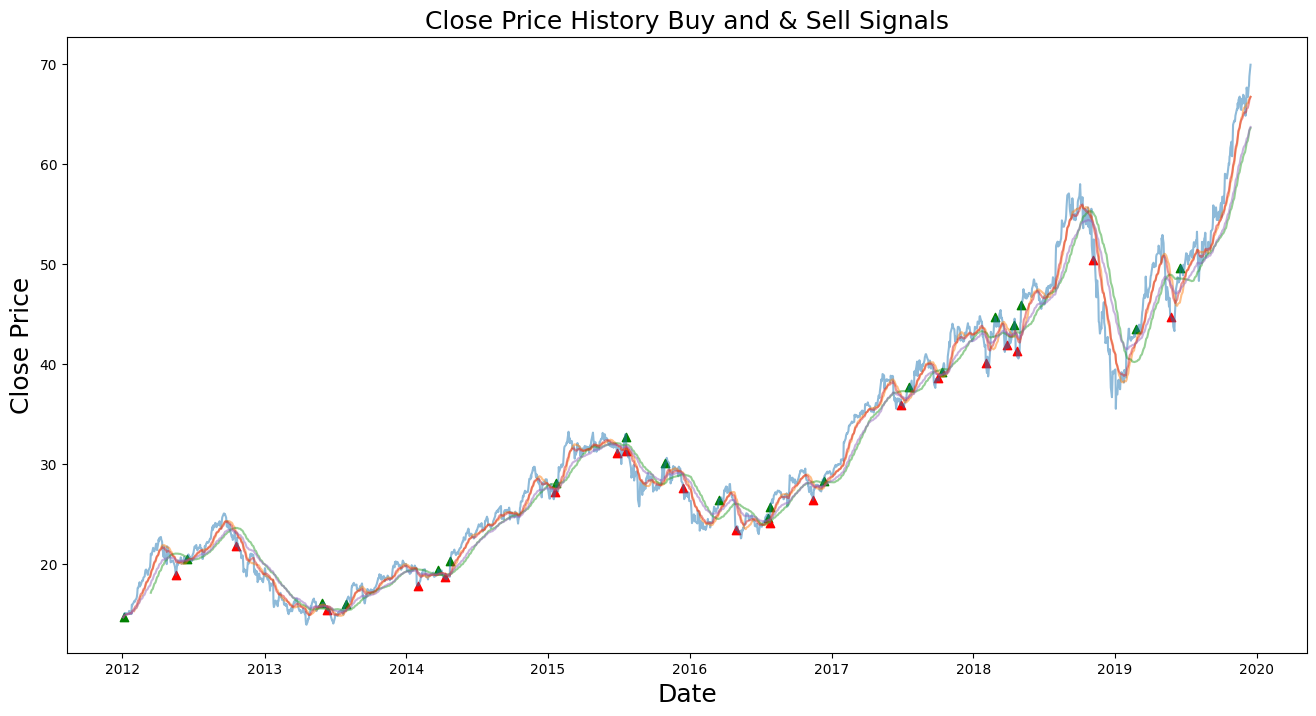

In [36]:
#Show the Close price with the MA ,WMA,EMA and Buy and Sell signals
plt.figure(figsize=(16,8))
plt.title('Close Price History Buy and & Sell Signals' , fontsize=18)
plt.plot(df['Close'], alpha=0.5 , label='Close')
plt.plot(df['MA20'], alpha=0.5 , label='MA20')
plt.plot(df['MA50'], alpha=0.5 , label='MA50')
plt.plot(df['EMA20'], alpha=0.5 , label='EMA20')
plt.plot(df['EMA50'], alpha=0.5 , label='EMA50')


plt.scatter(df.index,df['Buy'], alpha=1, label='Buy Signal', marker='^',color='green')

plt.scatter(df.index,df['Sell'], alpha=1, label='Sell Signal', marker='^',color='red')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [37]:
#img_4=cv2.imread('Project_4.PNG')
#cv2_imshow(img_4)